# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

643

In [3]:
# display list of cities
cities


['hofn',
 'bluff',
 'taolanaro',
 'lata',
 'evanston',
 'mehamn',
 'narsaq',
 'aklavik',
 'paamiut',
 'miandrivazo',
 'podporozhye',
 'kiunga',
 'tromso',
 'kapaa',
 'alotau',
 'vostok',
 'nikolskoye',
 'quebo',
 'castro',
 'rikitea',
 'kodiak',
 'airai',
 'upington',
 'kachiry',
 'longyearbyen',
 'tuktoyaktuk',
 'acari',
 'mount gambier',
 'lagoa',
 'las vegas',
 'ushuaia',
 'zyryanka',
 'havelock',
 'ancud',
 'safaga',
 'port alfred',
 'kavieng',
 'dalvik',
 'vaini',
 'posadas',
 'bilibino',
 'abha',
 'jamestown',
 'bredasdorp',
 'flinders',
 'illoqqortoormiut',
 'hermanus',
 'yellowknife',
 'katsuura',
 'pilao arcado',
 'paradwip',
 'shibarghan',
 'kaitangata',
 'noyabrsk',
 'san cristobal',
 'carsamba',
 'plettenberg bay',
 'nata',
 'constitucion',
 'baruun-urt',
 'georgetown',
 'kenai',
 'malwan',
 'yaita',
 'tabanan',
 'punta arenas',
 'hithadhoo',
 'camacha',
 'khandyga',
 'sao felix do xingu',
 'castlebar',
 'porto novo',
 'albany',
 'avarua',
 'ribeira grande',
 'mataura',
 'u

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# test cities

# api call - configuration information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# create/set city_count  variable
city_count = 0

# Create empty lists to store the JSON Data
city_list = []
latitude = []
longitude = []
temperature_max = []
humidity = []
clouds = []
wind_speed = []
country = []
date=[]

# Loop through the list of cities and perform a request for data on each
print("---------------------------------")
print("Beginning Data Retrieval")
print("---------------------------------")

# all cities in dataset
for city in cities: 
    # Build query URL
    query_url =f"{url}appid={weather_api_key}&q={city}&units={units}"
    #" url + "appid=" + weather_api_key + "&q=" + city + "units=" 
    weather_response = requests.get(query_url).json()
    if weather_response['cod'] == 200:        
        city_count = city_count + 1
        print(f"Processing Record {city_count} | {city}")
        #city_weather.append(weather_response)
        # Add JSON Data to the lists
        city_list.append(weather_response['name'])
        latitude.append(weather_response['coord']['lat'])
        longitude.append(weather_response['coord']['lon'])
        country.append(weather_response['sys']['country'])
        temperature_max.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        clouds.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        date.append(weather_response['dt'])
    else:
        print("City not found.  Skipping...")
        
print("---------------------------------")  
print("Data Retrieval Complete")
print("---------------------------------")  


---------------------------------
Beginning Data Retrieval
---------------------------------
Processing Record 1 | hofn
Processing Record 2 | bluff
City not found.  Skipping...
Processing Record 3 | lata
Processing Record 4 | evanston
Processing Record 5 | mehamn
Processing Record 6 | narsaq
Processing Record 7 | aklavik
Processing Record 8 | paamiut
Processing Record 9 | miandrivazo
Processing Record 10 | podporozhye
Processing Record 11 | kiunga
Processing Record 12 | tromso
Processing Record 13 | kapaa
City not found.  Skipping...
Processing Record 14 | vostok
Processing Record 15 | nikolskoye
Processing Record 16 | quebo
Processing Record 17 | castro
Processing Record 18 | rikitea
Processing Record 19 | kodiak
Processing Record 20 | airai
Processing Record 21 | upington
Processing Record 22 | kachiry
Processing Record 23 | longyearbyen
Processing Record 24 | tuktoyaktuk
Processing Record 25 | acari
Processing Record 26 | mount gambier
Processing Record 27 | lagoa
Processing Record 

Processing Record 227 | olafsvik
Processing Record 228 | evensk
Processing Record 229 | kikwit
Processing Record 230 | petropavlovsk-kamchatskiy
Processing Record 231 | luderitz
Processing Record 232 | tucurui
Processing Record 233 | atar
Processing Record 234 | salvador
Processing Record 235 | mancio lima
Processing Record 236 | muisne
Processing Record 237 | saint-joseph
Processing Record 238 | garoua boulai
City not found.  Skipping...
Processing Record 239 | lompoc
Processing Record 240 | livingstonia
Processing Record 241 | hamilton
Processing Record 242 | praia da vitoria
Processing Record 243 | geraldton
Processing Record 244 | vila velha
Processing Record 245 | lastoursville
Processing Record 246 | esperance
Processing Record 247 | rimavska sobota
Processing Record 248 | melilla
Processing Record 249 | bethel
Processing Record 250 | bang saphan
Processing Record 251 | diamantino
Processing Record 252 | atasu
Processing Record 253 | bonavista
City not found.  Skipping...
Process

Processing Record 458 | bastia
Processing Record 459 | puyang
Processing Record 460 | tavda
Processing Record 461 | nalut
Processing Record 462 | senador guiomard
City not found.  Skipping...
Processing Record 463 | gobabis
Processing Record 464 | chumikan
Processing Record 465 | griffith
Processing Record 466 | zhurivka
Processing Record 467 | yatou
Processing Record 468 | graaff-reinet
Processing Record 469 | tommot
Processing Record 470 | nacozari
Processing Record 471 | ibra
Processing Record 472 | manadhoo
Processing Record 473 | lasem
Processing Record 474 | san patricio
Processing Record 475 | coquimbo
Processing Record 476 | fort-shevchenko
Processing Record 477 | pochutla
Processing Record 478 | rocha
Processing Record 479 | bathsheba
Processing Record 480 | zhangjiakou
Processing Record 481 | muroto
Processing Record 482 | tual
Processing Record 483 | simao
Processing Record 484 | inza
Processing Record 485 | mogadishu
City not found.  Skipping...
Processing Record 486 | munc

In [5]:


#city_weather
#city_df = pd.DataFrame.from_dict(city_weather)
#city_df


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# putting the current weather data into DataFrame
cities_weather_df = pd.DataFrame()

# Write Lists to DataFrame

cities_weather_df['City'] = city_list
cities_weather_df['Lat'] = latitude
cities_weather_df['Lng'] = longitude
cities_weather_df['Max Temp'] = temperature_max
cities_weather_df['Humidity'] = humidity
cities_weather_df['Cloudiness'] = clouds
cities_weather_df['Wind Speed'] = wind_speed
cities_weather_df['Country'] = country
cities_weather_df['Date'] = date

In [7]:
# export to a csv
cities_weather_df.to_csv('..\output_data\cities_data.csv', index=False, header=True)

#display df 
cities_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hofn,64.2539,-15.2082,42.01,91,100,8.70,IS,1619372838
1,Bluff,-46.6000,168.3333,42.01,84,79,5.99,NZ,1619372838
2,Lata,40.1629,-8.3327,62.01,89,90,3.20,PT,1619372839
3,Evanston,42.0411,-87.6901,46.99,46,20,11.50,US,1619372667
4,Mehamn,71.0357,27.8492,35.60,69,75,11.50,NO,1619372839
...,...,...,...,...,...,...,...,...,...
586,Beringovskiy,63.0500,179.3167,30.22,89,100,3.06,RU,1619373001
587,Kahului,20.8947,-156.4700,73.40,73,20,11.50,US,1619372709
588,Dongsheng,39.8161,109.9776,43.86,89,93,10.47,CN,1619373001
589,Leningradskiy,69.3833,178.4167,14.54,89,28,2.98,RU,1619372930


In [8]:
cities_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,5.910000e+02
mean,19.853847,21.361777,61.589374,66.350254,55.546531,8.270457,1.619373e+09
std,33.414957,89.982489,21.758913,23.317866,37.020024,5.437319,9.802310e+01
min,-54.800000,-179.166700,-13.740000,5.000000,0.000000,0.250000,1.619372e+09
25%,-8.234850,-55.114700,46.400000,51.000000,20.000000,4.140000,1.619373e+09
50%,23.166700,23.900000,65.530000,71.000000,69.000000,6.910000,1.619373e+09
75%,47.839800,105.745250,79.115000,85.000000,90.000000,11.500000,1.619373e+09
max,78.218600,179.316700,105.800000,100.000000,100.000000,34.520000,1.619373e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# inspect the data and remove the cities where humidity > 100%
clean_cities_data_df = cities_weather_df.copy()
clean_cities_data_df = clean_cities_data_df[(clean_cities_data_df['Humidity'] < 101)]                   
clean_cities_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hofn,64.2539,-15.2082,42.01,91,100,8.70,IS,1619372838
1,Bluff,-46.6000,168.3333,42.01,84,79,5.99,NZ,1619372838
2,Lata,40.1629,-8.3327,62.01,89,90,3.20,PT,1619372839
3,Evanston,42.0411,-87.6901,46.99,46,20,11.50,US,1619372667
4,Mehamn,71.0357,27.8492,35.60,69,75,11.50,NO,1619372839
...,...,...,...,...,...,...,...,...,...
586,Beringovskiy,63.0500,179.3167,30.22,89,100,3.06,RU,1619373001
587,Kahului,20.8947,-156.4700,73.40,73,20,11.50,US,1619372709
588,Dongsheng,39.8161,109.9776,43.86,89,93,10.47,CN,1619373001
589,Leningradskiy,69.3833,178.4167,14.54,89,28,2.98,RU,1619372930


In [10]:
#  Get the indices of cities that have humidity over 100%.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 0, 'Latitude')

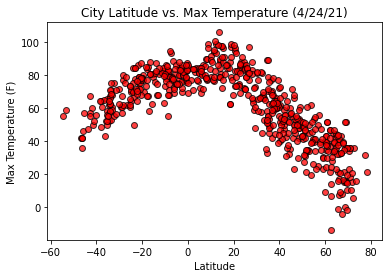

In [39]:
# latitude vs Temp (lt)
lt_x_axis = clean_cities_data_df['Lat'].tolist()
lt_y_axis = clean_cities_data_df['Max Temp'].tolist()

# the size of each point on our plot is determined by their x value
plt.scatter(lt_x_axis, lt_y_axis, marker="o", facecolors="red", edgecolors="black",
             alpha=0.75)

# labels to X and y axes 
plt.title("City Latitude vs. Max Temperature (4/24/21)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

In [26]:
lt_x_axis

[64.2539,
 -46.6,
 40.1629,
 42.0411,
 71.0357,
 60.9167,
 68.2191,
 61.994,
 -19.5167,
 60.9112,
 -6.1219,
 69.6496,
 22.0752,
 46.4856,
 59.7035,
 11.3333,
 -24.7911,
 -23.1203,
 57.79,
 -8.9266,
 -28.4478,
 53.0675,
 78.2186,
 69.4541,
 -15.4311,
 -37.8333,
 39.05,
 36.175,
 -54.8,
 65.75,
 34.8791,
 -41.8697,
 26.7292,
 -33.5906,
 -2.5744,
 65.9702,
 -21.2,
 -27.3671,
 68.0546,
 18.2164,
 42.097,
 -34.5322,
 -34.5833,
 -34.4187,
 62.456,
 35.1333,
 -46.2817,
 63.1994,
 7.7669,
 41.1989,
 -34.0527,
 8.3333,
 -35.3333,
 46.6806,
 5.4112,
 60.5544,
 36.8,
 -8.5413,
 -53.15,
 -0.6,
 33.0833,
 62.6667,
 -6.6447,
 53.85,
 6.4965,
 42.6001,
 -21.2078,
 38.5167,
 -46.1927,
 5.6667,
 46.4154,
 -9.8,
 -24.8667,
 55.7435,
 64.3833,
 28.3667,
 32.6667,
 32.1939,
 60.3778,
 -42.8794,
 -37.6167,
 -0.7393,
 4.8845,
 47.1847,
 69.2167,
 24.4228,
 -33.0153,
 57.4129,
 -8.3667,
 36.6702,
 67.45,
 66.0,
 63.4427,
 71.9167,
 -0.95,
 40.4536,
 -2.5167,
 40.5982,
 27.8006,
 -38.0023,
 -11.1806,
 71.2906

## Latitude vs. Humidity Plot

Text(0.5, 0, 'Latitude')

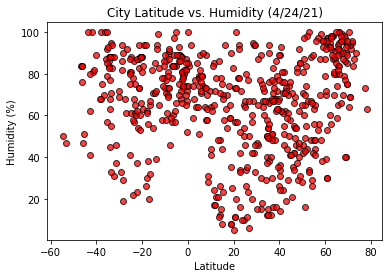

In [40]:
# latitude vs humidity (lh)
lh_x_axis = clean_cities_data_df['Lat'].tolist()
lh_y_axis = clean_cities_data_df['Humidity'].tolist()

# the size of each point on our plot is determined by their x value
plt.scatter(lh_x_axis, lh_y_axis, marker="o", facecolors="red", edgecolors="black",
             alpha=0.75)

# labels to X and y axes 
plt.title("City Latitude vs. Humidity (4/24/21)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

## Latitude vs. Cloudiness Plot

Text(0.5, 0, 'Latitude')

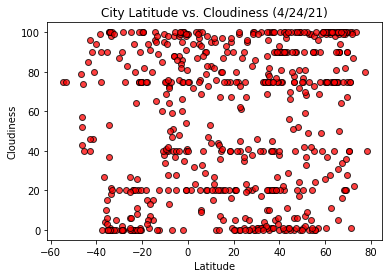

In [41]:
# latitude vs cloudines (lc)
lc_x_axis = clean_cities_data_df['Lat'].tolist()
lc_y_axis = clean_cities_data_df['Cloudiness'].tolist()

# the size of each point on our plot is determined by their x value
plt.scatter(lc_x_axis, lc_y_axis, marker="o", facecolors="red", edgecolors="black",
             alpha=0.75)

# labels to X and y axes 
plt.title("City Latitude vs. Cloudiness (4/24/21)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

## Latitude vs. Wind Speed Plot

Text(0.5, 0, 'Latitude')

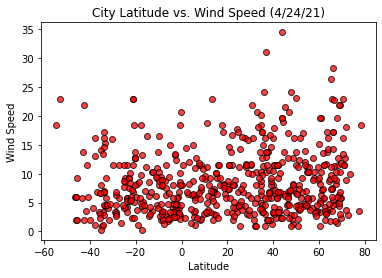

In [42]:
# latitude vs wind speed (lw)
lw_x_axis = clean_cities_data_df['Lat'].tolist()
lw_y_axis = clean_cities_data_df['Wind Speed'].tolist()

# the size of each point on our plot is determined by their x value
plt.scatter(lw_x_axis, lw_y_axis, marker="o", facecolors="red", edgecolors="black",
             alpha=0.75)

# labels to X and y axes 
plt.title("City Latitude vs. Wind Speed (4/24/21)")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

## Linear Regression

In [16]:
# northern hemisphere df
north_df = clean_cities_data_df.copy()
north_df = north_df[(north_df['Lat'] > 0)]
north_df



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hofn,64.2539,-15.2082,42.01,91,100,8.70,IS,1619372838
2,Lata,40.1629,-8.3327,62.01,89,90,3.20,PT,1619372839
3,Evanston,42.0411,-87.6901,46.99,46,20,11.50,US,1619372667
4,Mehamn,71.0357,27.8492,35.60,69,75,11.50,NO,1619372839
5,Narsaq,60.9167,-46.0500,51.80,30,75,19.57,GL,1619372711
...,...,...,...,...,...,...,...,...,...
585,Severo-Kuril'sk,50.6789,156.1250,31.48,97,100,11.18,RU,1619372932
586,Beringovskiy,63.0500,179.3167,30.22,89,100,3.06,RU,1619373001
587,Kahului,20.8947,-156.4700,73.40,73,20,11.50,US,1619372709
588,Dongsheng,39.8161,109.9776,43.86,89,93,10.47,CN,1619373001


In [17]:
# southern hemisphere df
south_df = clean_cities_data_df.copy()
south_df = south_df[(south_df['Lat'] < 0)]
south_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Bluff,-46.6000,168.3333,42.01,84,79,5.99,NZ,1619372838
8,Miandrivazo,-19.5167,45.4667,80.20,63,100,3.76,MG,1619372840
10,Kiunga,-6.1219,141.2906,72.90,97,98,1.88,PG,1619372841
16,Castro,-24.7911,-50.0119,69.53,61,100,8.48,BR,1619372842
17,Rikitea,-23.1203,-134.9692,77.65,75,80,7.52,PF,1619372843
...,...,...,...,...,...,...,...,...,...
572,Ambanja,-13.6833,48.4500,74.68,92,98,3.04,MG,1619372998
574,Camaçari,-12.6975,-38.3242,84.20,65,20,10.36,BR,1619372998
581,Sola,-13.8833,167.5500,82.51,72,95,4.27,VU,1619372950
583,Elliot,-31.3333,27.8500,56.66,37,5,4.70,ZA,1619373000


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7516921718213879


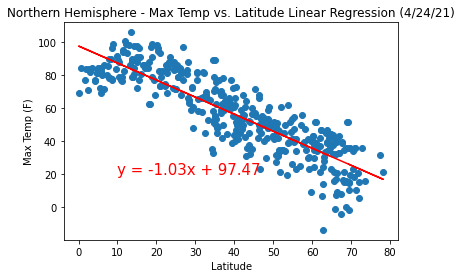

In [43]:
# Add the linear regression equation and line to plot
# regression max temp north (mtn)

reg_mtn_x_axis = north_df['Lat']
reg_mtn_y_axis = north_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(reg_mtn_x_axis, reg_mtn_y_axis)
regress_values = (reg_mtn_x_axis * slope) + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,20),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.scatter(reg_mtn_x_axis, reg_mtn_y_axis)
plt.plot(reg_mtn_x_axis,regress_values,"r-")

plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression (4/24/21)")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5737113984027329


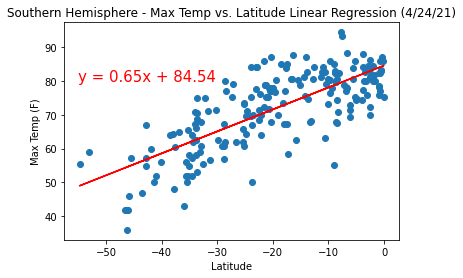

In [44]:
# Add the linear regression equation and line to plot
# regression max temp south(mts)

reg_mts_x_axis = south_df['Lat']
reg_mts_y_axis = south_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(reg_mts_x_axis, reg_mts_y_axis)
regress_values = (reg_mts_x_axis * slope) + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.scatter(reg_mts_x_axis, reg_mts_y_axis)
plt.plot(reg_mts_x_axis,regress_values,"r-")

plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression (4/24/21)")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.09910710163382093


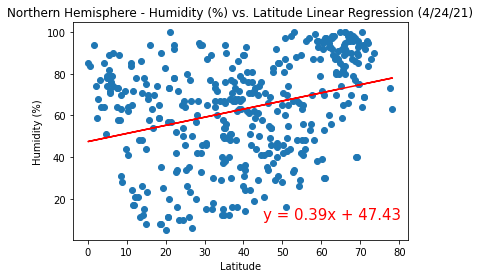

In [45]:
# Add the linear regression equation and line to plot
# regression humidity north(hn)

reg_hn_x_axis = north_df['Lat']
reg_hn_y_axis = north_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(reg_hn_x_axis, reg_hn_y_axis)
regress_values = (reg_hn_x_axis * slope) + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.scatter(reg_hn_x_axis, reg_hn_y_axis)
plt.plot(reg_hn_x_axis,regress_values,"r-")

plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression (4/24/21)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0095644809780711


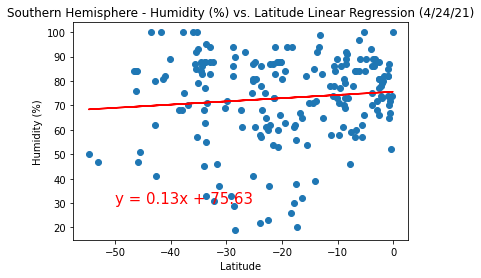

In [46]:
# Add the linear regression equation and line to plot
# regression humidity south(sn)

reg_hs_x_axis = south_df['Lat']
reg_hs_y_axis = south_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(reg_hs_x_axis, reg_hs_y_axis)
regress_values = (reg_hs_x_axis * slope) + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.scatter(reg_hs_x_axis, reg_hs_y_axis)
plt.plot(reg_hs_x_axis,regress_values,"r-")

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression (4/24/21)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.034048247418093786


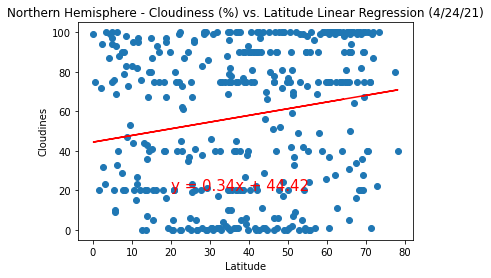

In [47]:
# Add the linear regression equation and line to plot
# regression cloudiness north(cn)

reg_cn_x_axis = north_df['Lat']
reg_cn_y_axis = north_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(reg_cn_x_axis, reg_cn_y_axis)
regress_values = (reg_cn_x_axis * slope) + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,20),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.scatter(reg_cn_x_axis, reg_cn_y_axis)
plt.plot(reg_cn_x_axis,regress_values,"r-")

plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (4/24/21)")
plt.ylabel("Cloudines")
plt.xlabel("Latitude")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.036215229402609184


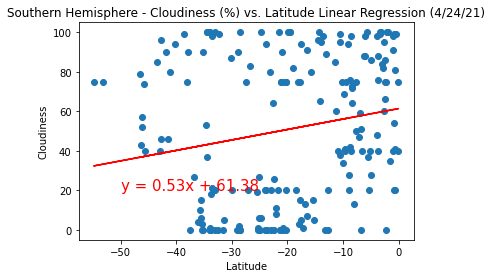

In [48]:
# Add the linear regression equation and line to plot
# regression cloudiness south(cs)

reg_cs_x_axis = south_df['Lat']
reg_cs_y_axis = south_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(reg_cs_x_axis, reg_cs_y_axis)
regress_values = (reg_cs_x_axis * slope) + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.scatter(reg_cs_x_axis, reg_cs_y_axis)
plt.plot(reg_cs_x_axis,regress_values,"r-")

plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (4/24/21)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.09910710163382093


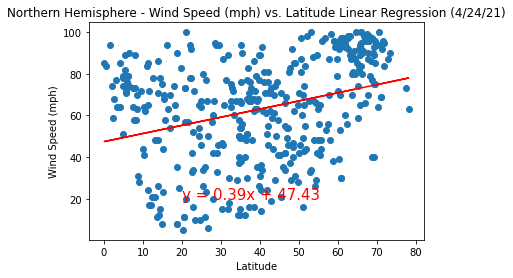

In [49]:
# Add the linear regression equation and line to plot
# regression Wind Speed (mph) north(wn)

reg_wn_x_axis = north_df['Lat']
reg_wn_y_axis = north_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(reg_wn_x_axis, reg_wn_y_axis)
regress_values = (reg_wn_x_axis * slope) + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,20),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.scatter(reg_wn_x_axis, reg_wn_y_axis)
plt.plot(reg_wn_x_axis,regress_values,"r-")

plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (4/24/21)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0095644809780711


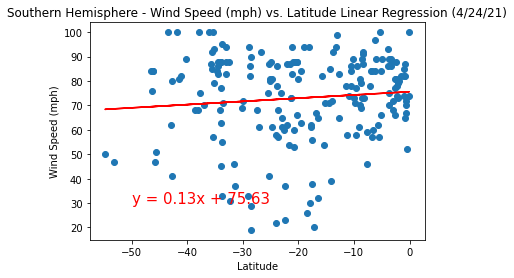

In [50]:
# Add the linear regression equation and line to plot
# regression Wind Speed (mph) south(ws)

reg_ws_x_axis = south_df['Lat']
reg_ws_y_axis = south_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(reg_ws_x_axis, reg_ws_y_axis)
regress_values = (reg_ws_x_axis * slope) + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.scatter(reg_ws_x_axis, reg_ws_y_axis)
plt.plot(reg_ws_x_axis,regress_values,"r-")

plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (4/24/21)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

plt.show()

#### Three oberservable trends based on the data

- The maximum temperatures increase toward zero latitude in both the northern and southern hemispheres. 
- The northern hemisphere has a more dramatic rise in humidity the farther the city is away from the equator.
- Wind Speed and Humidity share the same slopes for both the northern and southern hemispheres.  

